In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
df.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [5]:
df.duplicated().mean()*100

0.0

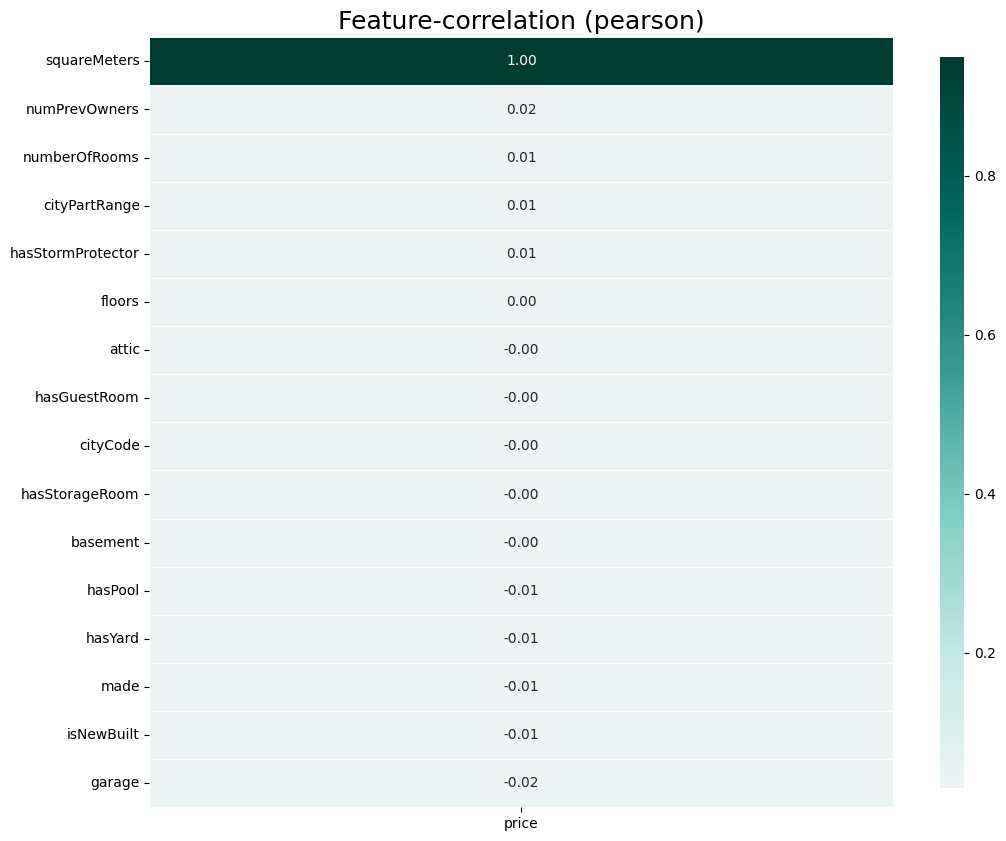

In [6]:
k.corr_plot(data=df, target='price');

In [7]:
x=df[['squareMeters']].values
x

array([[75523],
       [80771],
       [55712],
       ...,
       [83841],
       [59036],
       [ 1440]], dtype=int64)

In [8]:
y=df[['price']].values

In [9]:
sc=StandardScaler()

In [10]:
x=sc.fit_transform(x)

In [11]:
x

array([[ 0.89156241],
       [ 1.07395603],
       [ 0.20303346],
       ...,
       [ 1.18065352],
       [ 0.31855868],
       [-1.68318347]])

In [12]:
y

array([[7559081.5],
       [8085989.5],
       [5574642.1],
       ...,
       [8390030.5],
       [5905107. ],
       [ 146708.4]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.coef_

array([[2877295.58620878]])

In [17]:
model.intercept_

array([4993456.04858701])

In [18]:
training_score=model.score(x_train,y_train)*100
training_score

99.99987238468948

In [19]:
testing_score=model.score(x_test,y_test)*100
testing_score

99.99986723135196

In [20]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

99.99986723135196

In [21]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2675.365671261792

In [22]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

10672248.606441872

In [23]:
y_pred=model.predict(x)
y_pred

array([[7558744.64631841],
       [8083544.99772762],
       [5577643.31976203],
       ...,
       [8390545.20329665],
       [5910043.54233905],
       [ 150439.68567653]])

In [24]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,7559081.5,7.558745e+06
1,8085989.5,8.083545e+06
2,5574642.1,5.577643e+06
3,3232561.2,3.238042e+06
4,7055052.0,7.049344e+06


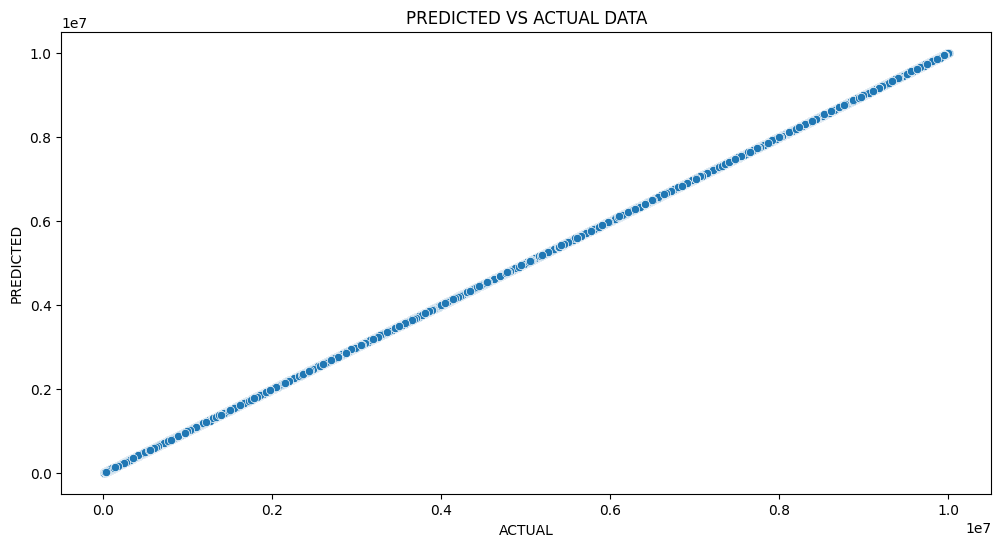

In [25]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

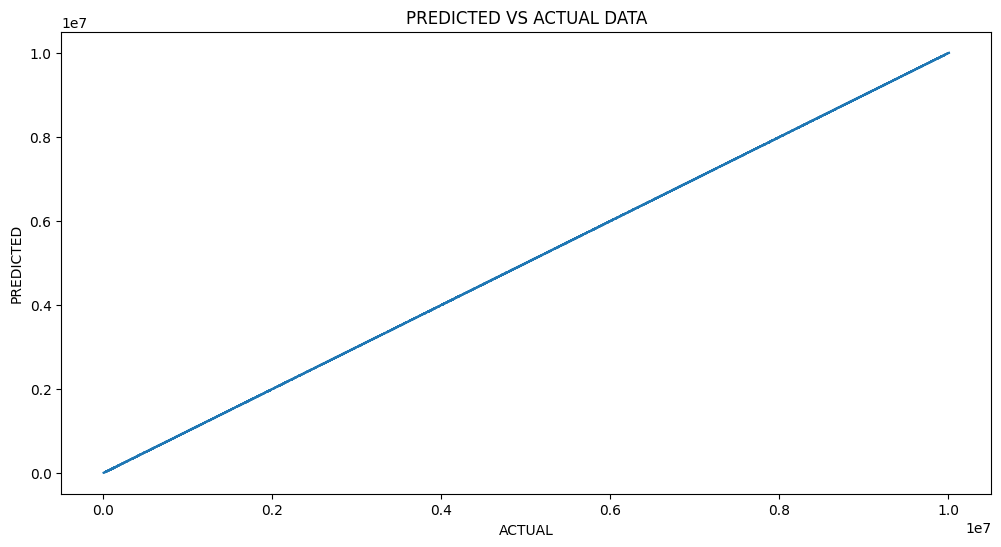

In [26]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");